In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('creditcard.csv')

In [3]:

from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
y = data['Class']
X = data.drop(columns=['Class', 'Time'])

In [8]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [9]:
scaler = RobustScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [10]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579


In [11]:
# Trying 0.1% contamination
iso = IsolationForest(
    n_estimators=200,
    contamination=0.01,   # placeholder, we’ll revisit
    random_state=42,
    n_jobs=-1
)

iso.fit(X)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",200
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.01
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",-1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [12]:
# -1 = anomaly, 1 = normal
preds = iso.predict(X)

# anomaly score (lower = more anomalous)
scores = iso.decision_function(X)

In [13]:
np.unique(preds, return_counts=True)


(array([-1,  1]), array([  2849, 281958]))

In [14]:
pd.Series(preds).value_counts()

 1    281958
-1      2849
Name: count, dtype: int64

In [15]:
pd.Series(scores)


0         0.208605
1         0.227081
2         0.122469
3         0.180130
4         0.209538
            ...   
284802   -0.045020
284803    0.178153
284804    0.184188
284805    0.158642
284806    0.205649
Length: 284807, dtype: float64

In [16]:
top_anomalies = np.argsort(scores)[:10]

X.iloc[top_anomalies]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
274771,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,...,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,358.683155
173353,-28.262775,-26.551515,-15.930586,6.945207,-19.203497,13.461737,23.718783,-9.419314,5.264773,2.362488,...,-21.028272,-8.701341,-2.932575,-22.459170,1.771003,-3.684737,-0.106886,4.071877,-2.383081,67.625795
206255,-40.042537,-38.430842,-21.277176,10.527243,-16.296090,8.799515,19.553200,-6.221785,6.121324,2.881454,...,-15.692536,-7.292757,-3.834799,-20.034848,1.575385,-4.196468,-0.851794,0.375152,-1.178134,23.120240
176335,-35.274010,-34.889342,-15.070015,9.211564,-6.226835,3.828063,10.778805,-6.462003,6.588395,4.524278,...,-15.595737,-7.090340,-4.722186,-26.429741,1.765486,-4.564506,-0.594620,1.110848,-0.714247,23.120240
151296,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,-8.908182,...,38.117209,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,263.927898
206228,-37.054295,-35.699829,-19.880878,9.552849,-16.701866,9.741883,21.014587,-6.414390,5.751017,2.598367,...,-15.406594,-7.167247,-2.817629,-14.414207,1.223594,-3.129609,-0.689271,0.289897,-1.181892,23.120240
220090,-37.558067,-29.335992,-24.962322,8.413616,-35.182120,21.550496,36.877368,-8.915982,5.046566,0.909474,...,-28.009635,-11.263235,-1.150828,-7.800902,1.272716,1.965365,0.767817,3.248189,13.013546,83.042688
173054,-22.132223,-19.815536,-11.183644,4.829787,-13.128465,10.689779,18.257057,-8.685409,5.250410,3.366931,...,-20.522094,-8.214994,-1.969170,-18.416215,1.376122,-2.965101,0.149369,4.077221,-1.975801,63.182282
231454,-35.905105,-31.041362,-19.472908,9.216960,-18.863553,10.713326,16.687265,-9.609234,3.296559,-1.368484,...,-21.964898,-2.661701,-3.016337,-19.331255,0.987774,-2.180899,-0.172480,6.228140,-2.830091,49.339202
219640,-34.614374,-29.145460,-14.985962,7.677798,-8.846632,5.571214,13.167616,-4.717060,6.091319,4.347796,...,-20.235060,-8.172558,-1.323059,-3.329551,0.452444,2.410307,0.580394,-1.363536,15.632689,19.496821


In [17]:
top_df = X.iloc[top_anomalies].copy()
top_df['score'] = scores[top_anomalies]

top_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,score
274771,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,358.683155,-0.197019
173353,-28.262775,-26.551515,-15.930586,6.945207,-19.203497,13.461737,23.718783,-9.419314,5.264773,2.362488,...,-8.701341,-2.932575,-22.459170,1.771003,-3.684737,-0.106886,4.071877,-2.383081,67.625795,-0.188415
206255,-40.042537,-38.430842,-21.277176,10.527243,-16.296090,8.799515,19.553200,-6.221785,6.121324,2.881454,...,-7.292757,-3.834799,-20.034848,1.575385,-4.196468,-0.851794,0.375152,-1.178134,23.120240,-0.187272
176335,-35.274010,-34.889342,-15.070015,9.211564,-6.226835,3.828063,10.778805,-6.462003,6.588395,4.524278,...,-7.090340,-4.722186,-26.429741,1.765486,-4.564506,-0.594620,1.110848,-0.714247,23.120240,-0.186578
151296,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,-8.908182,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,263.927898,-0.185655
206228,-37.054295,-35.699829,-19.880878,9.552849,-16.701866,9.741883,21.014587,-6.414390,5.751017,2.598367,...,-7.167247,-2.817629,-14.414207,1.223594,-3.129609,-0.689271,0.289897,-1.181892,23.120240,-0.183713
220090,-37.558067,-29.335992,-24.962322,8.413616,-35.182120,21.550496,36.877368,-8.915982,5.046566,0.909474,...,-11.263235,-1.150828,-7.800902,1.272716,1.965365,0.767817,3.248189,13.013546,83.042688,-0.182818
173054,-22.132223,-19.815536,-11.183644,4.829787,-13.128465,10.689779,18.257057,-8.685409,5.250410,3.366931,...,-8.214994,-1.969170,-18.416215,1.376122,-2.965101,0.149369,4.077221,-1.975801,63.182282,-0.177836
231454,-35.905105,-31.041362,-19.472908,9.216960,-18.863553,10.713326,16.687265,-9.609234,3.296559,-1.368484,...,-2.661701,-3.016337,-19.331255,0.987774,-2.180899,-0.172480,6.228140,-2.830091,49.339202,-0.174265
219640,-34.614374,-29.145460,-14.985962,7.677798,-8.846632,5.571214,13.167616,-4.717060,6.091319,4.347796,...,-8.172558,-1.323059,-3.329551,0.452444,2.410307,0.580394,-1.363536,15.632689,19.496821,-0.173776


In [18]:
top_df['original_amount'] = data.loc[top_df.index, 'Amount']

top_df[['original_amount', 'score']]

,original_amount,score
274771,25691.16,-0.197019
173353,4861.64,-0.188415
206255,1676.60,-0.187272
176335,1676.60,-0.186578
151296,18910.00,-0.185655
206228,1676.60,-0.183713
220090,5964.95,-0.182818
173054,4543.64,-0.177836
231454,3552.96,-0.174265
219640,1417.29,-0.173776


In [19]:
top_df['is_fraud'] = y.loc[top_df.index]

top_df[['original_amount', 'score', 'is_fraud']]

,original_amount,score,is_fraud
274771,25691.16,-0.197019,0
173353,4861.64,-0.188415,0
206255,1676.60,-0.187272,0
176335,1676.60,-0.186578,0
151296,18910.00,-0.185655,0
206228,1676.60,-0.183713,0
220090,5964.95,-0.182818,0
173054,4543.64,-0.177836,0
231454,3552.96,-0.174265,0
219640,1417.29,-0.173776,0


In [20]:

scores[y == 1].mean(), scores[y == 0].mean()

(np.float64(-0.008672897172068377), np.float64(0.18020734976916292))

In [21]:
k = 2849  # number of flagged anomalies
top_k_idx = np.argsort(scores)[:k]

y.iloc[top_k_idx].sum(), y.sum()

(np.int64(285), np.int64(492))

In [22]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
contaminations = [0.002, 0.005, 0.01, 0.02, 0.05]

results = []

for c in contaminations:
    iso = IsolationForest(
        n_estimators=200,
        contamination=c,
        random_state=42,
        n_jobs=-1,
    )
    
    iso.fit(X)
    scores_c = iso.decision_function(X)
    
    k = int(c * len(X))               # number of alerts
    top_k_idx = np.argsort(scores_c)[:k]
    
    frauds_caught = y.iloc[top_k_idx].sum()
    recall = frauds_caught / y.sum()
    
    results.append({
        "contamination": c,
        "alerts": k,
        "frauds_caught": int(frauds_caught),
        "recall": recall
    })

tuning_df = pd.DataFrame(results)
tuning_df

,contamination,alerts,frauds_caught,recall
0,0.002,569,150,0.304878
1,0.005,1424,218,0.443089
2,0.010,2848,285,0.579268
3,0.020,5696,356,0.723577
4,0.050,14240,419,0.851626


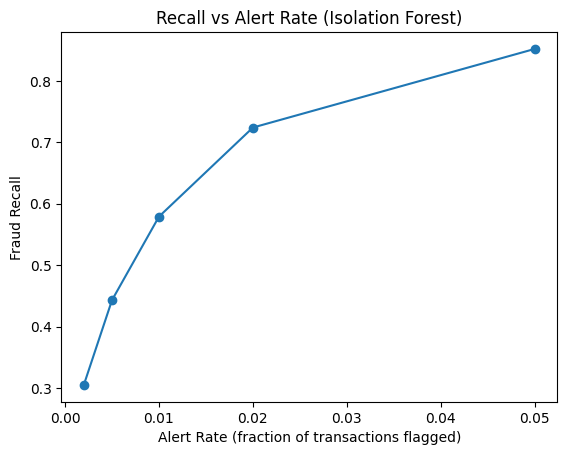

In [23]:
import matplotlib.pyplot as plt

alert_rate = [0.002, 0.005, 0.01, 0.02, 0.05]
recall = [0.305, 0.443, 0.579, 0.724, 0.852]
plt.figure()
plt.plot(alert_rate, recall, marker='o')
plt.xlabel("Alert Rate (fraction of transactions flagged)")
plt.ylabel("Fraud Recall")
plt.title("Recall vs Alert Rate (Isolation Forest)")
plt.show()

In [24]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

estimators_list = [50, 100, 200, 1000]
results = []

for n in estimators_list:
    iso = IsolationForest(
        n_estimators=n,
        contamination=0.02,
        random_state=42,
        n_jobs=-1,
    )
    
    iso.fit(X)
    scores_c = iso.decision_function(X)
    
    k = int(0.02 * len(X))               # number of alerts
    top_k_idx = np.argsort(scores_c)[:k]
    
    frauds_caught = y.iloc[top_k_idx].sum()
    recall = frauds_caught / y.sum()
    
    
    results.append({
        "n_estimators": n,
        "frauds_caught": int(frauds_caught),
        "recall": recall
    })

tuning_est = pd.DataFrame(results)
tuning_est

,n_estimators,frauds_caught,recall
0,50,344,0.699187
1,100,360,0.731707
2,200,356,0.723577
3,1000,354,0.719512


In [25]:
#we will keep estimators at 200, Initialize tuned model with 0.02 contamination with ~72% recall
iso_tuned = IsolationForest(
    n_estimators=200,
    contamination=0.02,   
    random_state=42,
    n_jobs=-1
)

iso_tuned.fit(X)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",200
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.02
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",-1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [26]:
# -1 = anomaly, 1 = normal
preds_tuned = iso_tuned.predict(X)

# anomaly score (lower = more anomalous)
scores_tuned = iso_tuned.decision_function(X)

In [27]:
y_true = y
y_pred = (preds_tuned == -1).astype(int)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[278974,   5341],
       [   136,    356]])

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.981     0.990    284315
           1      0.062     0.724     0.115       492

    accuracy                          0.981    284807
   macro avg      0.531     0.852     0.553    284807
weighted avg      0.998     0.981     0.989    284807



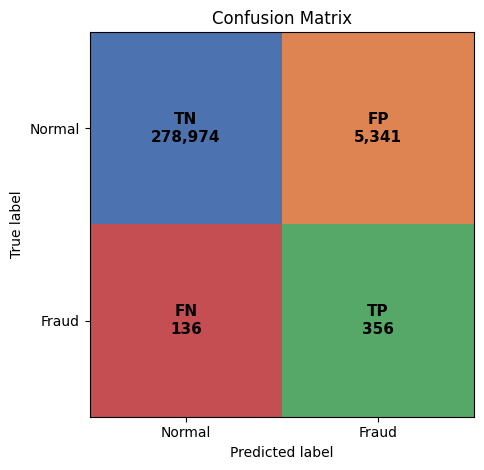

In [30]:
import numpy as np
from matplotlib.colors import ListedColormap

cm = np.array([[278974, 5341],
               [136,    356]])

labels = np.array([["TN", "FP"],
                   ["FN", "TP"]])

# Encoded matrix for coloring
color_codes = np.array([[0, 1],
                        [2, 3]])

cmap = ListedColormap(["#4C72B0",  # TN - blue
                       "#DD8452",  # FP - orange
                       "#C44E52",  # FN - red
                       "#55A868"]) # TP - green

fig, ax = plt.subplots()
im = ax.imshow(color_codes, cmap=cmap)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Normal", "Fraud"])
ax.set_yticklabels(["Normal", "Fraud"])
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix")

for i in range(2):
    for j in range(2):
        ax.text(
            j, i,
            f"{labels[i, j]}\n{cm[i, j]:,}",
            ha="center",
            va="center",
            fontsize=11,
            fontweight="bold"
        )

plt.tight_layout()
plt.show()


Now, we will see if adding Time feature (after some preprocessing) will improve the model. Time will be converted using cyclical encoding so that hour 23(or 47) and hour zero are close to each other from the point of view of the model.



In [31]:
#Time from original data frame, converted to fractional hour of the day
df_time=(data[['Time']]/3600)%24
df_time.columns = ['hour_of_day']


In [32]:

theta = 2 * np.pi * df_time['hour_of_day'] / 24

df_time['hour_sin'] = np.sin(theta)
df_time['hour_cos'] = np.cos(theta)

In [33]:
#sanity check on the computed data
df_time.loc[
    df_time['hour_of_day'].isin([0, 6, 12, 18]),
    ['hour_of_day', 'hour_sin', 'hour_cos']
]

,hour_of_day,hour_sin,hour_cos
0,0.0,0.000000e+00,1.000000e+00
1,0.0,0.000000e+00,1.000000e+00
47401,12.0,1.224647e-16,-1.000000e+00
47402,12.0,1.224647e-16,-1.000000e+00
47403,12.0,1.224647e-16,-1.000000e+00
47404,12.0,1.224647e-16,-1.000000e+00
47405,12.0,1.224647e-16,-1.000000e+00
94251,18.0,-1.000000e+00,-1.836970e-16
144786,0.0,0.000000e+00,1.000000e+00
156380,6.0,1.000000e+00,6.123234e-17


In [34]:

X_time = X.join(df_time[['hour_sin', 'hour_cos']])


In [35]:
X_time[['hour_sin','hour_cos']].head()

,hour_sin,hour_cos
0,0.000000,1.0
1,0.000000,1.0
2,0.000073,1.0
3,0.000073,1.0
4,0.000145,1.0


In [36]:
# now we train the X_time dataset
iso_time = IsolationForest(
    n_estimators=200,
    contamination=0.02,
    random_state=42
)

iso_time.fit(X_time)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",200
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.02
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [37]:
# -1 = anomaly, 1 = normal
preds_time = iso_time.predict(X_time)

# anomaly score (lower = more anomalous)
scores_time = iso_time.decision_function(X_time)

In [38]:
y_pred_time = (preds_time == -1).astype(int)

In [39]:
#sanity check

np.unique(y_pred_time)


array([0, 1])

In [40]:

cm_time = confusion_matrix(y_true, y_pred_time)
cm_time

array([[278955,   5360],
       [   155,    337]])

In [ ]:
# we can see that the encoding method for time didnt improve the perfromance, we need to find a better approach to encode time feature
# we will compute delta-time ( seconds since previous transaction) and try the model on it.
time_delta = data['Time'].diff()


In [42]:
time_delta.isna().sum()

np.int64(1)

In [43]:
#filling the first row since the value is NaN
time_delta = time_delta.fillna(0)

In [44]:
time_delta.describe()

count    284807.000000
mean          0.606699
std           1.053380
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          32.000000
Name: Time, dtype: float64

In [45]:
time_delta.isna().sum()

np.int64(0)

In [46]:
(time_delta < 0).sum()

np.int64(0)

In [47]:
X_time_delta=X.join(time_delta.rename('time delta'))

In [48]:
X_time_delta.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,time delta
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,1.0


In [49]:
iso_td = IsolationForest(
    n_estimators=200,
    contamination=0.02,
    random_state=42
)

iso_td.fit(X_time_delta)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",200
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.02
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [50]:
preds_td = iso_td.predict(X_time_delta)
y_pred_td = (preds_td == -1).astype(int)


In [51]:
cm_td = confusion_matrix(y_true, y_pred_td)
cm_td

array([[278955,   5360],
       [   155,    337]])

Recall decreased to ~68.5% 

In [52]:
X_td= X_time_delta

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof_td = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.02,
    metric="minkowski"
)

y_pred_lof = lof_td.fit_predict(X_td)

In [54]:
y_pred_lof_bin = (y_pred_lof == -1).astype(int)

In [55]:


cm_lof = confusion_matrix(y_true, y_pred_lof_bin)
cm_lof


array([[278652,   5663],
       [   458,     34]])

LOF model: the perfromance degraded the recall to ~7%
We conclude that the best model is Isolation forest, including time parameter was not necessary it decreased the performance of the models.